<img src="./Picture2.png">

## House Price Prediction Report

House price prediction is very significant for estate field. The accurate prediction will help both groups of sellers and buyers. Afterall, house is one of the biggest investment for each family.

This project will take advantage of a dataset on Kaggle, explore the features, and build regression models. Data wrangling, EDA, and preprocessing will focus on cleaning the data, exploring the data, and preparing the train and test dataset.

For the modeling part, I am going to apply several popular regression modeling methods and compare their performance. The metric used is the root mean square error. The time used by each method is also estimated and compared.

### 1.0 Data

Kaggle has an excellent dataset for house price prediction. Below is the Kaggle API for this dataset.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques.


### 2.0 Methodology

The house price prediction is a classic regression problem. In reality, the house price is impacted by house size, year built, location, lot size, school zone, bed room numbers, bath room numbers, garage size....  

The dataset has 79 numerical and categorical variables and 'SalePrice' as dependent variable. It also contains missing values. Below is the summarized workflow. 
* The data wrangling will initially check and clean the data.
* EDA will explore and investigate all numerical and categorical features and select the most related ones.
* The preprocessing will get dummies for categorical features, scale the variables, and get the train and test data for modeling.
* The modeling will test several regression modeling algorithms, validate those models, and compare their performance. The metrics used here is root mean square error. The modeling algorithms include LogisticRegression, Lasso, Ridge, ElasticNet, SVR, Random Forest, XGboost, XGboost_dmatrix, LightGBM, Catboost. Cross validation is used here to train the model. Grid search is used to tune hyperparameters.

### 3.0 Data wrangling

"SalePrice" is the dependent variable. 79 variables in total is in this dataset. Out of them, 37 numerical features and 42 categorical features. Missing data is observed with some features.

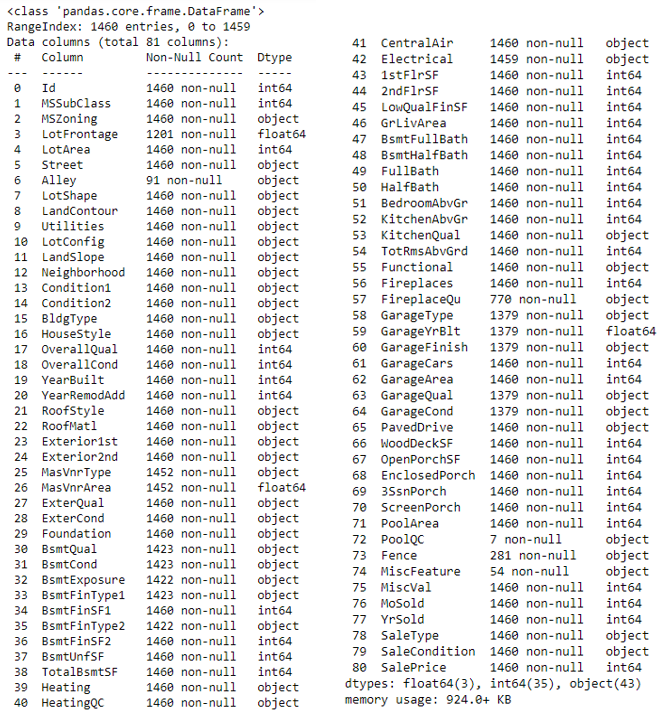

#### 3.1 Categorical features

42 categorical features are included. "PoolQC", "MiscFeature", "Alley", "Fence", and "FireplaceQu" have too many missing data from 47% to 99.5%. They are not being used for building the model.

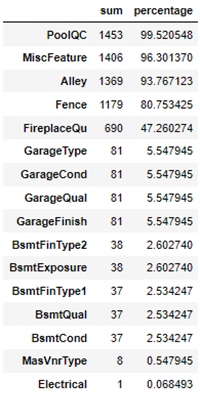

#### 3.2 Numerical features

37 numerical features are in this dataset. "LotFrontage" has 17.7% missing value and "GarageYrBlt" 5.5%.

Some features, like "TotRmsAbvGrd", have a normal distribution.

Some features are more like categorical data, like "FullBath".

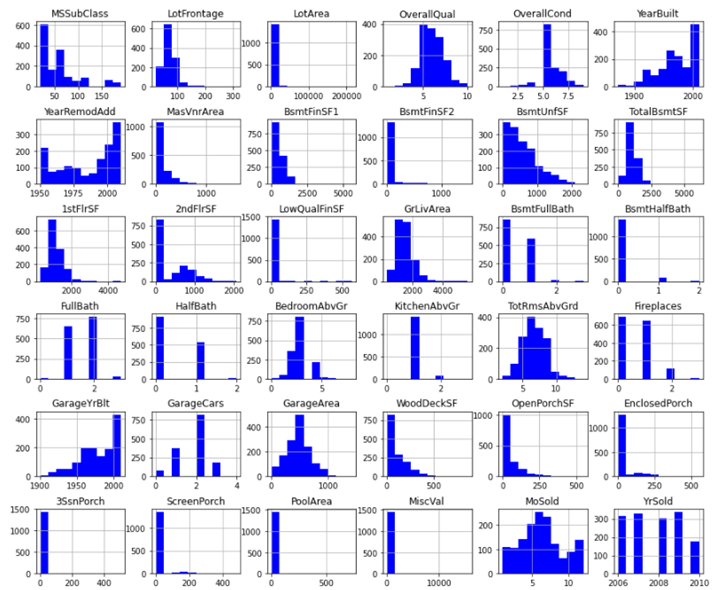

For the detailed the data wrangling work, please check out the notebook below.

https://github.com/Abby2021/Springboard/blob/main/Capstone_Project/CapstoneProject2_house_price_regression_DataWrangling.ipynb

### 4.0 EDA

#### 4.1 Dependent variable

"SalePrice" is the dependent variable. The basic statistics are as below.

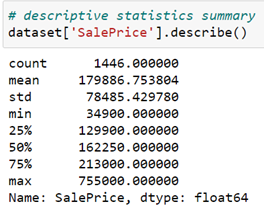

The distribution of "SalePrice" is not normal. 
The Skewness and Kurtosis are estimated to quantitatively check the distribution. 

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. If Skewness is close to 0, then the distribution shape is symetric; if Skewness < 0, the distribution is left tailed; if Skewness > 0, the distribution is right tailed.

Kurtosis is measuring of whether the data are heavy-tailed or light-tailed relative to a normal distribution. If Kurtosis close to 0, the data has a normal distribution; if Kurtosis > 0, the data is steeper than normal distribution; if Kurtosis < 0, the data is gentler than normal distribution.

The Skewness is estimated as 1.9 and Kurtosis 6.8. So the data distrubition is very steep and has a right tail. 

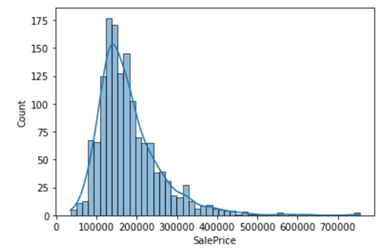

#### 4.2 Numerical features

A total of 37 numerical features are available, but which ones are strongly correlated to "SalePrice"? That's the question I need to figure out with EDA.

For this step, I am checking the correlation between any two numerical features including "SalePrice". With the heat map of correlation matrix, the strongly correlated features with "SalePrice" have light color on the plot. "OverallQual", "TotalBsmtSF", "1stFlrSF", "GrLiveArea", "GarageCars", and "GarageArea" are highly correlated with "SalePrice". They must be used for model building. "GarageCars" and "GarageArea" are also highly correlated. "GarageArea" will be used for the modeling.



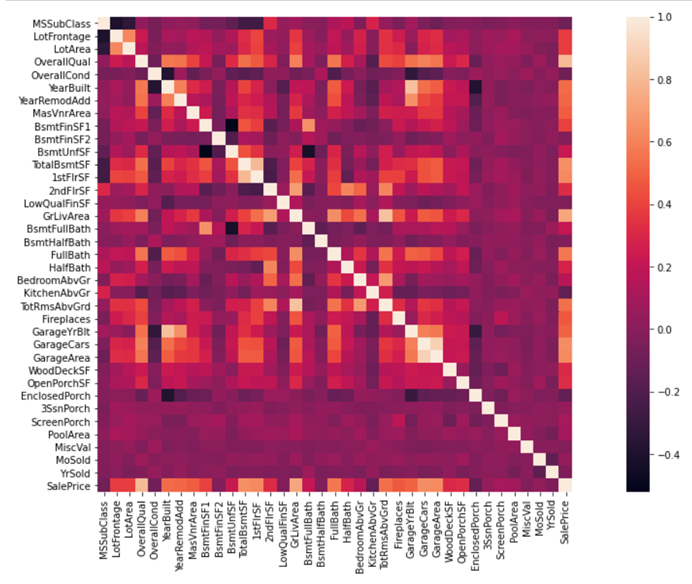

#### 4.3 Categorical features

A total of 42 categorical features are available, but not all of them have high correlation with "SalePrice". "CentraAir" and "Neighborhood" are two having high correlation with "SalePrice".

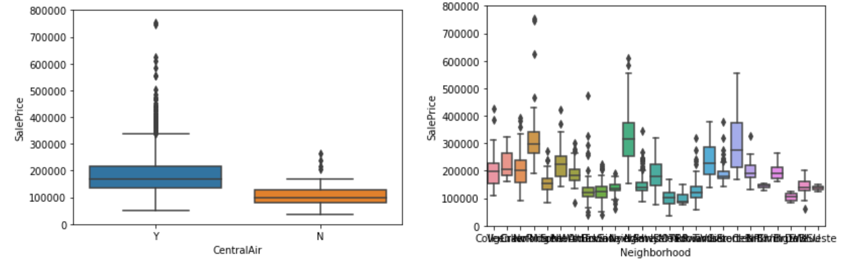

Convert these two categorical features to be numerical by using LabelEncoder of preprocessing and plot them with other numerical features. From the correlation matrx plot, it is clear that those two features are not strongly related to "SalePrice".

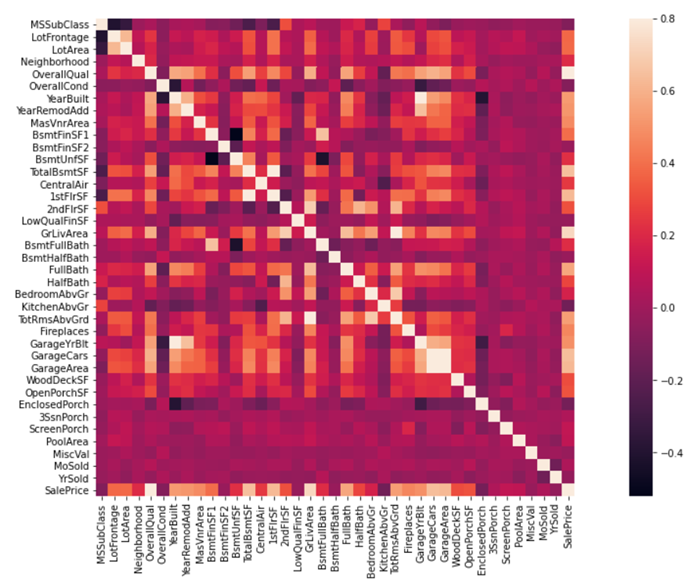

#### 4.4 Top 8 features highly correlated to "SalePrice"

Top 8 features highly coorelated to "SalePrice" include "OverallQual", "GrLiveArea", "TotalBsmtSF", "GarageArea"/"GarageCars", "1stFlrSF", "FullBath", "TotRmsAbvGrd", and "YearBuilt". "YearBuilt" and "SalePrice" have a correlation coefficient of 0.53. "OverallQual" and "SalePrice" have a correlation coefficient up to 0.8. "GarageArea" and "GarageCars" have a similarity of 0.89. 

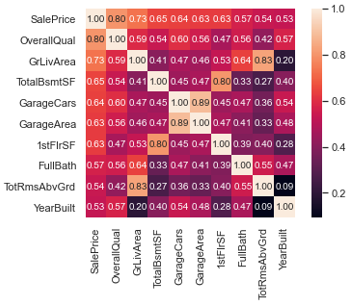

The below picutre shows the crossplot of top 8 features and "SalePrice". From those plots, it is clear that "OverallQual", "FullBath", and "TotRmsAbvGrd" are more like categorical features than numerical. The solution here is to convert them to be categorical and get dummies for modeling. 

In this project, all those 8 features will be used for building the models.

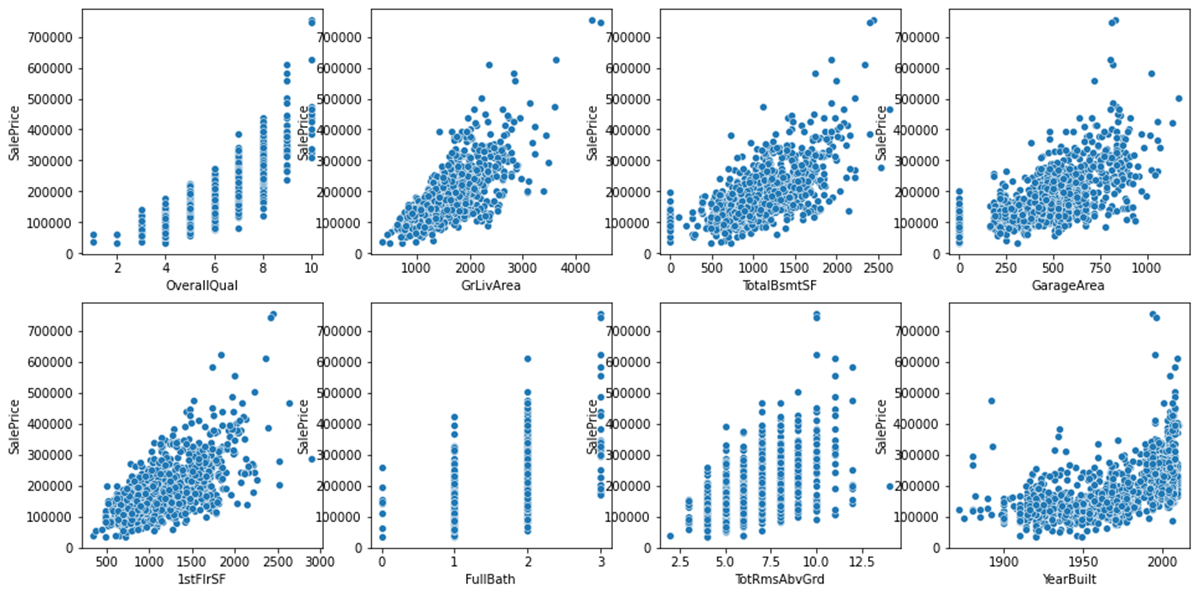

### 5.0 Preprocessing

The preprocessing will continue to prepare train and test data for model building. 
The following steps are used for this project:

1. Missing data final check
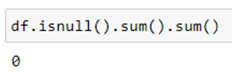
2. Get dummies for converted categorical features
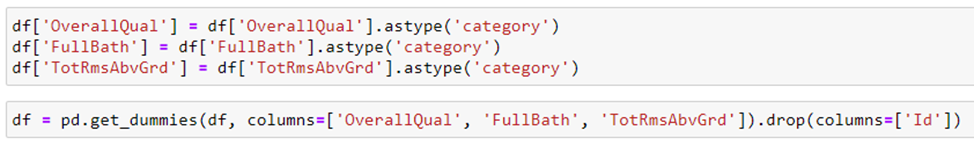    
3. Train and test data split
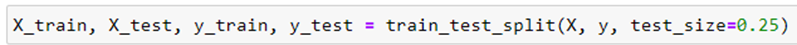
4. Scale the variables with StandardScaler
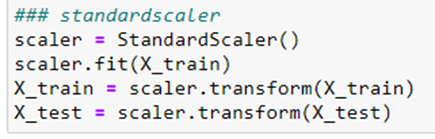

### 6.0 Algorithms, machine learning, and model validation

Regression model building has many machine learning algorithms, like linear regression, lasso, ridge...And many classification algorithms can be adjusted to build regression model, like SVR, randome forest, and other tree-based methods. 

In reality, data scientists might not test more than 3 methods to build a better predictive model for house price due to timeline or other reasons. However, as an exercise project, it is applaudable to try most popular machine learning algorithms and compare their performance.

The first try was to use LinearRegression to build a baseline model. But the result is too bad. So I change the baseline model to be with Lasso.

Cross validation, by Wikipedia, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. It is an effective method of avoiding overfitting. In this project, I used cross validation to train all model parameters except Linear Regression.

Hyperparameter tuning is a key step in machine learning model building especially when the modeling algorithms have several sensitive key superparameters. And a good set of hyperparameters would improve the model prediction accuracy, running speed, and avoid overfitting. In this project, grid-search was used to tune hyperparameters for XGboost, LightBGM model.  

#### 6.1 Linear Regression

Linear Regression is a simple and fundemental method for building a regression model. It gets all the model parameters by taking in the variables and fitting to the dependent variable. It is a good baseline model. 

A common method used is the Ordinary Least Square method (OLS). The model parameters are set iteratively through minimizing the difference between the model prediction and real meansurement.

#### 6.2 Lasso, Ridge and ElasticNet

Overfitting is a key problem when build a predictive model. The model works perfectly with training data, but terrible with validation data. An approach effectively tickles this issue is to add regularization term to cost function. 

The common form of regularization could be the l1 norm and l2 norm. You can use other norms for some specific problems. 

With the regularization term in the form of l1 norm on top of OLS, Lasso has a power of effectively selecting features and giving them different weight to build the model, because lasso penalizes the sum of their absolute values (L1 penalty). In the case where you have too many features to fit a regression model and you don't know which ones are important, Lasso method is a good method in this space.

Ridge regression penalizes the sum of squared coefficients (the so-called L2 penalty). It also works well in the space of coefficient shrinkage and reducing model complexity.

ElasticNet penalizes both the sum of their absolute values and the sum of squared coefficients. It works to seek a balance with the dataset and find out the best penalty term for the problem you want to solve.

Lasso, Ridge, and ElasticNet are three popular algorithms to build a regression model.

#### 6.3 SVR

Support Vector Machine (SVM) is a popular algorithms for classification problems. Before deep learning, SVM had been used widely to build models with large dataset. The kernel technique helps SVM to effectively solve the classification problem in higher dimension space without really converting to the higher oder space. So it works very fast. 

Support Vector Regressor is developed based on the SVM for regression problems. The objective is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points. So we are going to take only those points that are within the decision boundary and have the least error rate. This gives us a better fitting model.

#### 6.4 Tree-based method

Decision tree is a classic method for classification problems in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

Decision tree often has overfitting problem if the tree is developed too deep. And a single tree's performance is often medium accuracy. 

Ensamble methods developed on top of decision tree work better to deal with the above issues. Two typical ensampling methods. One is the bagging method. Random Forest is an example. Another group is the boosting method. Adeboost, XGboost, LightGBM, and Catboost are popular methods in this group. 
 
Adeboost is the original boosting method. It only handles numerical features and no regularization in the function to avoid overfitting.

XGboost is developed on top of Adeboost to include the regularization term. It improve the model accuracy and performance. One weakpoint is the slowness. 

LightGBM is improvement on top of XGboost. It also gives accurate and high performance model while reducing the model building and predicting time. It not only works with numerical data but also categorical data.

Catboost is good at handling categorical data, and build accurate models.

Grid-search is used to tune hyperparameter for XGboost, LightGBM, and Catboost. This process takes longer time especially when you have several parameters to tune.

### 7.0 Model result comparison

The models built with different algorithms are validated with test data. RMSE is used to measure the model performance and compare them. 

The below picture clearly shows that tree-based boosting methods work generally better than other methods. But they typically work slower. Regression methods of Lasso, Ridge, and ElasticNet give comparable results, but much faster. Linear Regression and SVR perform worst in this case.

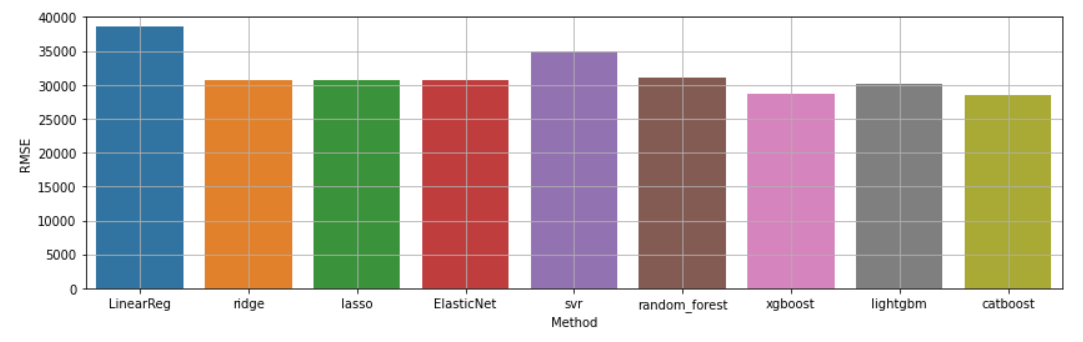

### 9.0 Summary

House price prediction model is a very useful tool for both buyers and sellers. 

Through data wrangling and EAD, I picked the most important features related to "SalePrice" and used them to build predictive models. Top 8 features include  "OverallQual", "GrLiveArea", "TotalBsmtSF", "GarageArea"/"GarageCars", "1stFlrSF", "FullBath", "TotRmsAbvGrd", and "YearBuilt". 

The techniques used to build better models include cross-validation and hyperparameter tuning. 

Multiple modeling alrogithms are used to build models. By comparing their accuracy and perforamnce, tree-based boosting algorithms work generally better than others, although they might take longer time. Regression methods with regularization, like Lasso, Ridge, and ElasticNet, give comparable results, but faster. Lienar Regression and SVR perform worst in this case.